In [1]:
#Installing the necessary libraries
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://bitbucket.org/habedi/datasets/raw/b6769c4664e7ff68b001e2f43bc517888cbe3642/spark/spark-3.0.2-bin-hadoop2.7.tgz
!tar xf spark-3.0.2-bin-hadoop2.7.tgz
!rm -rf spark-3.0.2-bin-hadoop2.7.tgz*
!pip -q install findspark pyspark graphframes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.4 MB/s eta 0:00:00


In [2]:
import os
os.environ["PYSPARK_DRIVER_PYTHON"] = "jupyter"
os.environ["PYSPARK_DRIVER_PYTHON_OPTS"] = "notebook"
os.environ["PYSPARK_SUBMIT_ARGS"] = "--packages graphframes:graphframes:0.8.1-spark3.0-s_2.12 pyspark-shell"

In [3]:
from graphframes import *
from pyspark import *
from pyspark.sql import *
spark = SparkSession.builder.appName('myfunction').getOrCreate()

In [4]:
vertices = spark.read.option('header', 'true').csv('nodes.csv')
edges = spark.read.option('header', 'true').csv('edges.csv')

In [5]:
vertices.show(5)
edges.show(5)

+---+--------------------+
| id|                Name|
+---+--------------------+
|  1|Apparel accessori...|
|  2|    Used Car Dealers|
|  3|Residential Elect...|
|  4|       Wheat Farming|
|  5|Printed Circuit A...|
+---+--------------------+
only showing top 5 rows

+---+---+--------+
|src|dst|relation|
+---+---+--------+
|  1| 50|Owned By|
|  2| 50|Owned By|
|  3| 50|Owned By|
|  4| 50|Owned By|
|  5| 50|Owned By|
+---+---+--------+
only showing top 5 rows



In [6]:
mygraph = GraphFrame(vertices, edges)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


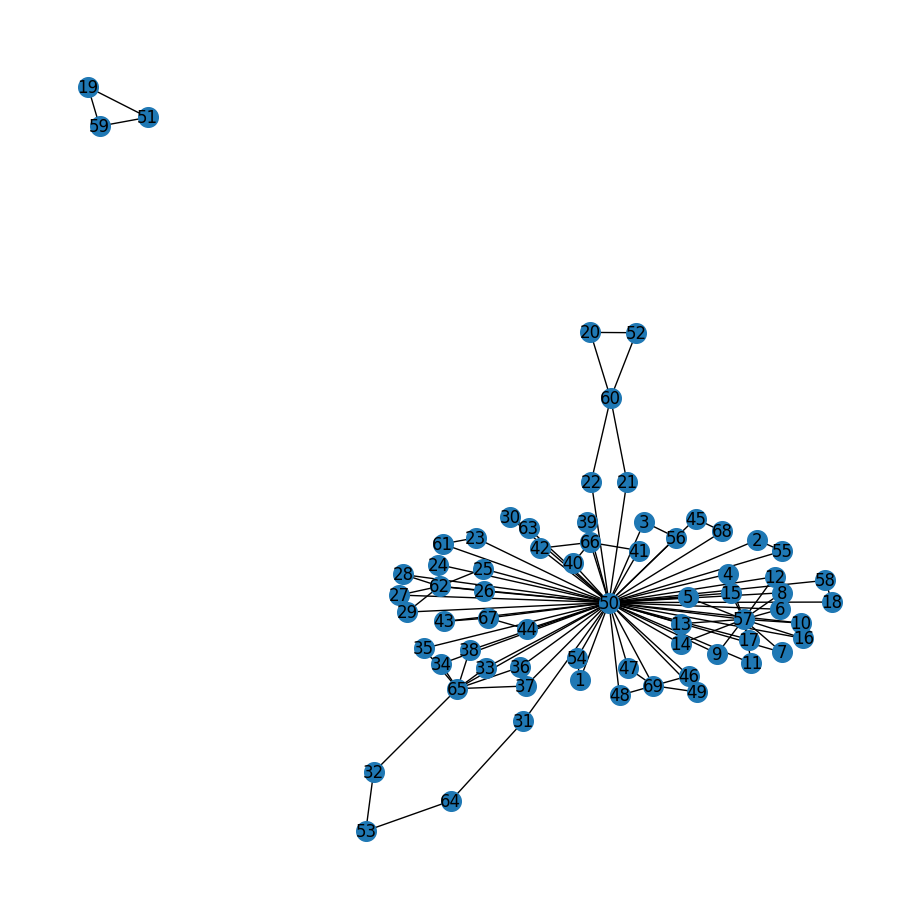

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
# the function will plot the source and destination nodes and connect them by meand of undirected line
def plot_undirected_graph(edge_list):
    plt.figure(figsize=(9,9))
    gplot=nx.Graph()
    for row in edge_list.select("src", "dst").take(500):
        gplot.add_edge(row["src"], row["dst"])
    nx.draw(gplot,with_labels=True, node_size=200)
plot_undirected_graph(mygraph.edges)

In [8]:
result4=mygraph.filterEdges("relation='Owned By'");
result4.vertices.show()
result4.edges.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+--------------------+
| id|                Name|
+---+--------------------+
|  1|Apparel accessori...|
|  2|    Used Car Dealers|
|  3|Residential Elect...|
|  4|       Wheat Farming|
|  5|Printed Circuit A...|
|  6|           Foundries|
|  7|Iron and steel mi...|
|  8|Measuring and Dis...|
|  9|Computer terminal...|
| 10|Motor Vehicle Bra...|
| 11|Misc Nonmetallic ...|
| 12|Floor Covering St...|
| 13|Television Broadc...|
| 14|Farm Product Ware...|
| 15|Bus/Other Motor V...|
| 16|Navigational Serv...|
| 17|Motor Vehicle Ste...|
| 18|Asphalt Paving an...|
| 19|Hydroelectric Pow...|
| 20|Warehouse Clubs a...|
+---+--------------------+
only showing top 20 rows

+---+---+--------+
|src|dst|relation|
+---+---+--------+
|  1| 50|Owned By|
|  2| 50|Owned By|
|  3| 50|Owned By|
|  4| 50|Owned By|
|  5| 50|Owned By|
|  6| 50|Owned By|
|  7| 50|Owned By|
|  8| 50|Owned By|
|  9| 50|Owned By|
| 10| 50|Owned By|
| 11| 50|Owned By|
| 12| 50|Owned By|
| 13| 50|Owned By|
| 14| 50|Owned By|
| 1

In [16]:
x=mygraph.pageRank(maxIter=10)
x.vertices.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


+---+--------------------+-------------------+
| id|                Name|           pagerank|
+---+--------------------+-------------------+
| 37|Manufactured (Mob...|0.48608236982766984|
| 43|Funds, Trusts & O...|0.48608236982766984|
|  8|Measuring and Dis...|0.48608236982766984|
| 62|  Los Angeles County| 1.7255924128882278|
| 64|         Napa County| 0.6926673770044295|
|  6|           Foundries|0.48608236982766984|
| 12|Floor Covering St...|0.48608236982766984|
| 46|Other Community H...|0.48608236982766984|
| 16|Navigational Serv...|0.48608236982766984|
| 29|Confectionery mfg...|0.48608236982766984|
| 20|Warehouse Clubs a...|0.48608236982766984|
| 69|San Bernardino Co...| 1.3124223985347088|
|  5|Printed Circuit A...|0.48608236982766984|
| 19|Hydroelectric Pow...|0.48608236982766984|
| 53|    State Government| 1.2814346474581946|
| 42|Household and Ins...|0.48608236982766984|
| 15|Bus/Other Motor V...|0.48608236982766984|
| 14|Farm Product Ware...|0.48608236982766984|
|  3|Resident

In [19]:
from pyspark.sql.functions import desc
sorted_vertices = x.vertices.orderBy(desc("pagerank"))
sorted_vertices.show()

+---+--------------------+------------------+
| id|                Name|          pagerank|
+---+--------------------+------------------+
| 50|             Private|23.086482154965193|
| 57|          California|3.3782724703023046|
| 65|       Orange County|1.9321774200649875|
| 62|  Los Angeles County|1.7255924128882278|
| 52|  Federal Government|1.6326291596586862|
| 69|San Bernardino Co...|1.3124223985347088|
| 66|       Placer County|1.3124223985347088|
| 53|    State Government|1.2814346474581946|
| 51|    Local Government|1.2814346474581946|
| 60|         Kern County|1.1058373913579487|
| 67|    Riverside County|0.8992523841811891|
| 64|         Napa County|0.6926673770044295|
| 55|        Butte County|0.6926673770044295|
| 54|      Alameda County|0.6926673770044295|
| 63|        Marin County|0.6926673770044295|
| 59|     Imperial County|0.6926673770044295|
| 61|        Kings County|0.6926673770044295|
| 56|    Calaveras County|0.6926673770044295|
| 68|   Sacramento County|0.692667

In [20]:
mygraph.triangleCount().show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+-----+---+--------------------+
|count| id|                Name|
+-----+---+--------------------+
|    1|  7|Iron and steel mi...|
|    1| 15|Bus/Other Motor V...|
|    1| 11|Misc Nonmetallic ...|
|    1|  3|Residential Elect...|
|    1|  8|Measuring and Dis...|
|    1| 16|Navigational Serv...|
|    1|  5|Printed Circuit A...|
|    1| 18|Asphalt Paving an...|
|    1| 17|Motor Vehicle Ste...|
|    1|  6|           Foundries|
|    1| 19|Hydroelectric Pow...|
|    1|  9|Computer terminal...|
|    1|  1|Apparel accessori...|
|    1| 20|Warehouse Clubs a...|
|    1| 10|Motor Vehicle Bra...|
|    1|  4|       Wheat Farming|
|    1| 12|Floor Covering St...|
|    1| 13|Television Broadc...|
|    1| 14|Farm Product Ware...|
|    0| 21|All Other Textile...|
+-----+---+--------------------+
only showing top 20 rows

